In [119]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
df = pd.read_csv('CollegeRookieStatLog5.csv')
df.head()

,Unnamed: 0,Name,School,G,MP,FG,FGA,FG%,2P,2PA,...,Year,Pos,#,Wins,Losses,Pts,Rbds,Offense,Defense,Diff
0,0,Kenyon Martin,Cincinnati,116.0,23.7,4.4,7.5,0.586,4.4,7.5,...,2000,PF,23,31,51,-1.04,-5.26,105.87,106.99,-1.12
1,1,Stromile Swift,LSU,50.0,26.6,5.1,9.0,0.560,4.9,8.4,...,2000,PF,26,22,60,-5.62,0.27,103.19,109.36,-6.18
2,2,Marcus Fizer,Iowa State,97.0,32.9,7.1,13.9,0.511,6.9,13.2,...,2000,PF,28,17,65,-9.40,-0.74,95.25,105.81,-10.56
3,3,Chris Mihm,Texas,96.0,31.4,5.2,10.4,0.497,5.1,10.1,...,2000,C,28,17,65,-9.40,-0.74,95.25,105.81,-10.56
4,4,Khalid El-Amin,UConn,108.0,30.3,5.4,12.9,0.416,3.6,7.8,...,2000,PG,28,17,65,-9.40,-0.74,95.25,105.81,-10.56


In [120]:
df = df.drop(['Unnamed: 0'], axis=1)

In [121]:
df1 = df.replace('C-', 'C')
df1.head()

,Name,School,G,MP,FG,FGA,FG%,2P,2PA,2P%,...,Year,Pos,#,Wins,Losses,Pts,Rbds,Offense,Defense,Diff
0,Kenyon Martin,Cincinnati,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,...,2000,PF,23,31,51,-1.04,-5.26,105.87,106.99,-1.12
1,Stromile Swift,LSU,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,...,2000,PF,26,22,60,-5.62,0.27,103.19,109.36,-6.18
2,Marcus Fizer,Iowa State,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,...,2000,PF,28,17,65,-9.40,-0.74,95.25,105.81,-10.56
3,Chris Mihm,Texas,96.0,31.4,5.2,10.4,0.497,5.1,10.1,0.503,...,2000,C,28,17,65,-9.40,-0.74,95.25,105.81,-10.56
4,Khalid El-Amin,UConn,108.0,30.3,5.4,12.9,0.416,3.6,7.8,0.456,...,2000,PG,28,17,65,-9.40,-0.74,95.25,105.81,-10.56


In [122]:
df1['Fouls'] = df1['PF']
df1 = df1.drop(['PF'], axis=1)
dum1 = pd.get_dummies(df1['Pos'])
df1 = pd.concat([df1, dum1], axis=1)
df1 = df1.drop(['Pos'], axis=1)
df1.head()

,Name,School,G,MP,FG,FGA,FG%,2P,2PA,2P%,...,Rbds,Offense,Defense,Diff,Fouls,C,PF,PG,SF,SG
0,Kenyon Martin,Cincinnati,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,...,-5.26,105.87,106.99,-1.12,2.0,0,1,0,0,0
1,Stromile Swift,LSU,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,...,0.27,103.19,109.36,-6.18,2.6,0,1,0,0,0
2,Marcus Fizer,Iowa State,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,...,-0.74,95.25,105.81,-10.56,1.9,0,1,0,0,0
3,Chris Mihm,Texas,96.0,31.4,5.2,10.4,0.497,5.1,10.1,0.503,...,-0.74,95.25,105.81,-10.56,1.9,1,0,0,0,0
4,Khalid El-Amin,UConn,108.0,30.3,5.4,12.9,0.416,3.6,7.8,0.456,...,-0.74,95.25,105.81,-10.56,1.4,0,0,1,0,0


In [123]:
schoolnames = df1.School.unique()
sc_dict = dict(zip(schoolnames, range(len(schoolnames))))
df1 = df1.replace({'School': sc_dict})
df1.head()

,Name,School,G,MP,FG,FGA,FG%,2P,2PA,2P%,...,Rbds,Offense,Defense,Diff,Fouls,C,PF,PG,SF,SG
0,Kenyon Martin,0,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,...,-5.26,105.87,106.99,-1.12,2.0,0,1,0,0,0
1,Stromile Swift,1,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,...,0.27,103.19,109.36,-6.18,2.6,0,1,0,0,0
2,Marcus Fizer,2,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,...,-0.74,95.25,105.81,-10.56,1.9,0,1,0,0,0
3,Chris Mihm,3,96.0,31.4,5.2,10.4,0.497,5.1,10.1,0.503,...,-0.74,95.25,105.81,-10.56,1.9,1,0,0,0,0
4,Khalid El-Amin,4,108.0,30.3,5.4,12.9,0.416,3.6,7.8,0.456,...,-0.74,95.25,105.81,-10.56,1.4,0,0,1,0,0


In [124]:
df1 = df1.drop(['School'], axis=1)
df1 = df1.set_index('Name')
df1.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,Rbds,Offense,Defense,Diff,Fouls,C,PF,PG,SF,SG
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,0.0,0.1,...,-5.26,105.87,106.99,-1.12,2.0,0,1,0,0,0
Stromile Swift,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,0.2,0.7,...,0.27,103.19,109.36,-6.18,2.6,0,1,0,0,0
Marcus Fizer,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,0.2,0.7,...,-0.74,95.25,105.81,-10.56,1.9,0,1,0,0,0
Chris Mihm,96.0,31.4,5.2,10.4,0.497,5.1,10.1,0.503,0.1,0.3,...,-0.74,95.25,105.81,-10.56,1.9,1,0,0,0,0
Khalid El-Amin,108.0,30.3,5.4,12.9,0.416,3.6,7.8,0.456,1.8,5.1,...,-0.74,95.25,105.81,-10.56,1.4,0,0,1,0,0


In [125]:
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
df1 = df1[[c for c in df1 if c not in cols_at_end] + [c for c in cols_at_end if c in df1]]
df1.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,C,PF,PG,SF,SG,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,0.0,0.1,...,0,1,0,0,0,7.4,1.9,1.1,1.7,12.0
Stromile Swift,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,0.2,0.7,...,0,1,0,0,0,3.6,0.4,0.8,1.0,4.9
Marcus Fizer,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,0.2,0.7,...,0,1,0,0,0,4.3,1.1,0.4,0.3,9.5
Chris Mihm,96.0,31.4,5.2,10.4,0.497,5.1,10.1,0.503,0.1,0.3,...,1,0,0,0,0,4.7,0.3,0.3,0.9,7.6
Khalid El-Amin,108.0,30.3,5.4,12.9,0.416,3.6,7.8,0.456,1.8,5.1,...,0,0,1,0,0,1.6,2.9,1.0,0.0,6.3


In [126]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
dum = ['NBATRB','NBAAST','NBASTL','NBABLK']
for du in dum:
    cols.remove(du)

In [127]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#cols = df1.columns
sc2 = StandardScaler()
for col in cols:
    df1[[col]] = sc2.fit_transform(df1[[col]])
#df1['NBAPTS'] = sc2.fit_transform(df1['NBAPTS'])
sc3 = StandardScaler()
df1[['NBABLK']] = sc3.fit_transform(df1[['NBABLK']])
sc4 = StandardScaler()
df1[['NBASTL']] = sc4.fit_transform(df1[['NBASTL']])
sc5 = StandardScaler()
df1[['NBAAST']] = sc5.fit_transform(df1[['NBAAST']])
sc6 = StandardScaler()
df1[['NBATRB']] = sc6.fit_transform(df1[['NBATRB']])
df1.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,C,PF,PG,SF,SG,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,0.793321,-1.093329,-0.277654,-0.913530,1.911551,0.532617,0.148853,1.358108,-1.371998,-1.418086,...,-0.336668,1.977698,-0.559017,-0.477308,-0.609608,2.643235,0.491030,1.583621,4.513215,1.557789
Stromile Swift,-0.978362,-0.466567,0.264058,-0.375310,1.453015,0.917756,0.533693,1.264622,-1.111093,-1.114957,...,-0.336668,1.977698,-0.559017,-0.477308,-0.609608,0.636749,-0.591392,0.811463,2.311609,-0.120812
Marcus Fizer,0.283291,0.895019,1.811806,1.382874,0.588851,2.458310,2.586176,0.124095,-1.111093,-1.114957,...,-0.336668,1.977698,-0.559017,-0.477308,-0.609608,1.006365,-0.086262,-0.218081,0.110003,0.966732
Chris Mihm,0.256448,0.570832,0.341445,0.127028,0.341947,1.071811,1.260614,-0.268545,-1.241546,-1.317043,...,2.970283,-0.505638,-0.559017,-0.477308,-0.609608,1.217574,-0.663554,-0.475467,1.997094,0.517529
Khalid El-Amin,0.578572,0.333095,0.496220,1.024061,-1.086569,-0.083605,0.277133,-1.147312,0.976143,1.107988,...,-0.336668,-0.505638,1.788854,-0.477308,-0.609608,-0.419297,1.212644,1.326235,-0.833543,0.210179


In [136]:
df3 = df1[0:559]
df4 = df1[559:]

In [137]:
df4.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,C,PF,PG,SF,SG,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Zion Williamson,-1.434705,0.268257,3.282168,1.131705,3.569335,3.459670,1.645455,4.293563,-0.458832,-0.357135,...,-0.336668,1.977698,-0.559017,-0.477308,-0.609608,-1.264133,-0.880038,-1.247624,-0.833543,-1.279283
Jaxson Hayes,-1.461548,-1.179779,-0.741979,-1.702919,4.415862,0.070451,-0.791868,3.938317,-1.371998,-1.468607,...,-0.336668,1.977698,-0.559017,-0.477308,-0.609608,-1.264133,-0.880038,-1.247624,-0.833543,-1.279283
Nickeil Alexander-Walker,-0.522019,0.246645,-0.045492,0.019384,-0.240041,-0.545771,-0.663588,0.217581,0.845691,0.804859,...,-0.336668,-0.505638,-0.559017,-0.477308,1.640399,-1.264133,-0.880038,-1.247624,-0.833543,-1.279283
RJ Barrett,-1.300486,1.413719,2.817843,3.033414,-0.416401,2.150199,2.158575,0.217581,1.106595,1.663725,...,-0.336668,-0.505638,-0.559017,-0.477308,1.640399,-1.264133,-0.880038,-1.247624,-0.833543,-1.279283
Ignas Brazdeikis,-1.327330,0.181807,0.264058,0.342316,-0.275313,-0.083605,-0.022187,-0.324637,0.584786,0.501731,...,-0.336668,-0.505638,-0.559017,2.095085,-0.609608,-1.264133,-0.880038,-1.247624,-0.833543,-1.279283


In [138]:
train=df3[0:(round(len(df3)*.8))] 
test=df3[(round(len(df3)*.8)):]
trains = np.split(train, [37], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [37], axis=1)
test_x=tests[0]
test_y=tests[1]

In [139]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [140]:
test_y.tail()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,
Jacob Evans,-0.841715,-0.302746,-0.732853,-0.519028,-0.971934
Gary Trent,0.531144,-0.374908,-0.218081,-0.204512,0.493887
Hamidou Diallo,-0.260890,-0.663554,-0.218081,-0.204512,-0.404520
Chimezie Metu,-0.630506,-0.591392,-0.732853,-0.519028,-0.853723
Thomas Welsh,-1.052924,-0.519231,-1.247624,-0.833543,-0.901007


## Correlation Matrix

AxesSubplot(0.127273,0.125;0.617727x0.755)


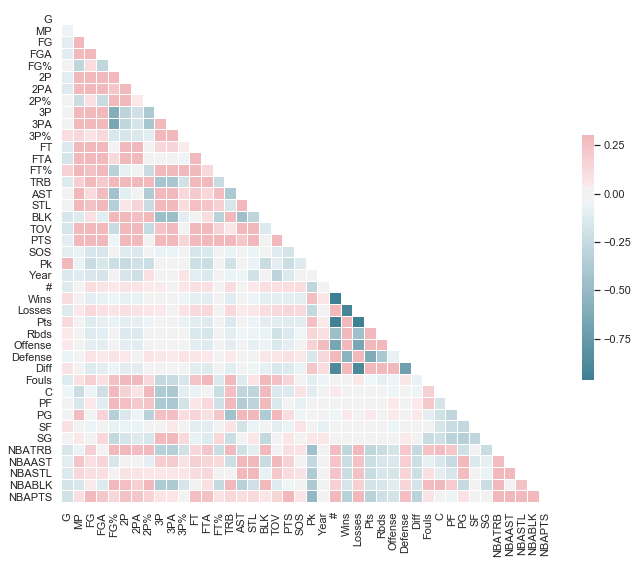

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df3

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .5}))

## Feature Selection

In [55]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model, 27)
reg = rfe.fit(train_x.values, train_y.NBAPTS.values)
print(reg.support_)
print(reg.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
 False  True False  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 3 1 4 1 1 1]


In [53]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(min_samples_split=4, n_estimators=1000,bootstrap=True).fit(train_x.values, train_y.NBAPTS.values)
reg.feature_importances_

array([0.02639107, 0.02280796, 0.02953288, 0.02528272, 0.02371604,
       0.02145294, 0.02224592, 0.02609673, 0.01691843, 0.01601543,
       0.0184737 , 0.01899643, 0.01816565, 0.01941082, 0.0233939 ,
       0.02154739, 0.0267428 , 0.01711463, 0.01773604, 0.0295289 ,
       0.02217772, 0.40602378, 0.0205165 , 0.02615077, 0.01966102,
       0.01584246, 0.01149436, 0.00500743, 0.01682252, 0.01473306])

In [56]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
picks = []
for x in range(0,30):
    if reg.support_[x]:
        picks.append(cols[x])
train_x=train_x[picks]
test_x=test_x[picks]
train_x.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,BLK,TOV,PTS,SOS,Pk,Year,0,2,3,4
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,0.782355,-1.081579,-0.265304,-0.896388,1.900090,0.532753,0.147913,1.365056,-1.353378,-1.396589,...,2.531948,-0.716974,-0.661878,-0.057171,-1.550535,-1.748342,1.926424,-0.337395,-0.555556,-0.599145
Stromile Swift,-0.989817,-0.459079,0.276500,-0.358995,1.441185,0.918489,0.532755,1.270929,-1.091713,-1.092955,...,2.677441,0.560722,-0.018668,-0.290328,-1.488428,-1.748342,1.926424,-0.337395,-0.555556,-0.599145
Marcus Fizer,0.272184,0.893249,1.824514,1.396491,0.576324,2.461433,2.585246,0.122573,-1.091713,-1.092955,...,0.204057,0.276789,1.455357,-0.166554,-1.364213,-1.748342,1.926424,-0.337395,-0.555556,-0.599145
Mike Miller,-0.587051,-0.437613,-0.187903,-0.287342,0.082118,-0.315867,-0.579011,0.894419,0.216615,0.324004,...,-0.668903,0.134823,-0.045468,0.063725,-1.302106,-1.748342,-0.519096,-0.337395,-0.555556,-0.599145
DerMarr Johnson,-1.473137,-0.265889,-0.265304,-0.287342,-0.006133,-0.701603,-1.006614,1.082674,0.739946,0.779455,...,0.204057,-1.000906,-0.233071,0.475347,-1.239998,-1.748342,-0.519096,-0.337395,-0.555556,-0.599145


## Linear Regression

In [142]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x.values, train_y.NBAPTS.values)
#reg.score(train_x.values, train_y.NBAPTS.values)

reg.coef_

array([-2.32770951e-02, -2.62556060e-01, -6.35100633e-01, -1.98926698e+00,
        6.01544960e-02,  1.13160052e-01,  1.89744485e+00,  1.39075976e-01,
        1.82900733e-01,  1.39102923e+00, -4.13205005e-02, -2.18483852e-01,
        9.33893853e-02,  2.76641452e-02,  1.54154263e-01,  1.91883106e-01,
        3.18071603e-02, -3.66642845e-03, -9.39782698e-02,  6.58439594e-01,
        1.94525089e-02, -3.51310426e-01,  6.94466155e-02, -2.60729817e-01,
       -2.78581675e-01,  2.45925361e-01,  2.59545426e-01, -5.14991001e-02,
       -2.72297787e+01,  2.55709245e+01,  3.68786430e+01,  2.11483014e-02,
       -5.34187057e-02, -1.04543865e-01,  1.01310551e-01, -8.52885387e-03,
        4.14387861e-02])

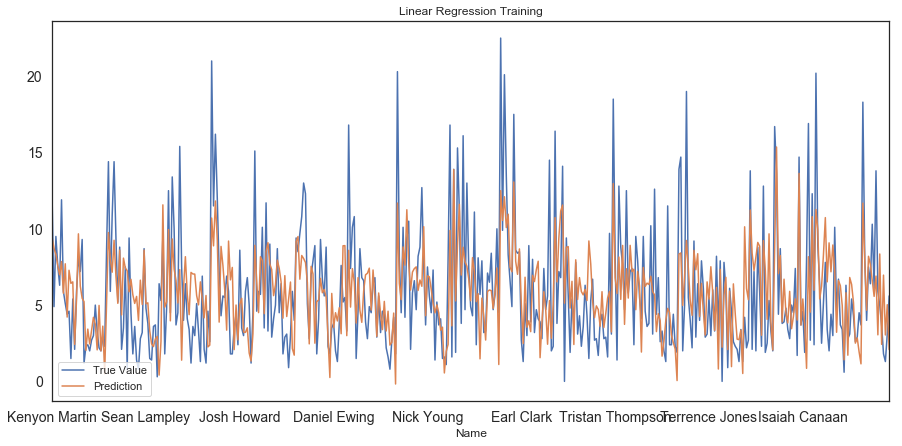

adj train r^2 = 0.3557307245610236
train mse = 9.80169627064006


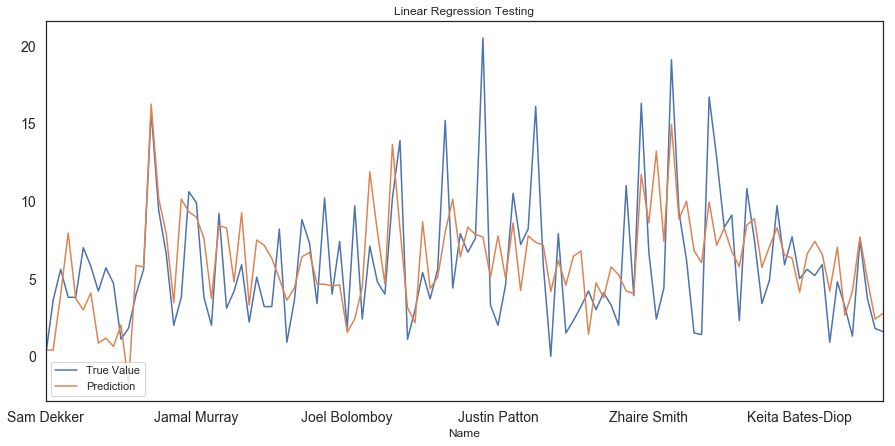

adj test r^2 = 0.21010831445994704
test mse = 12.188894442173185


In [143]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

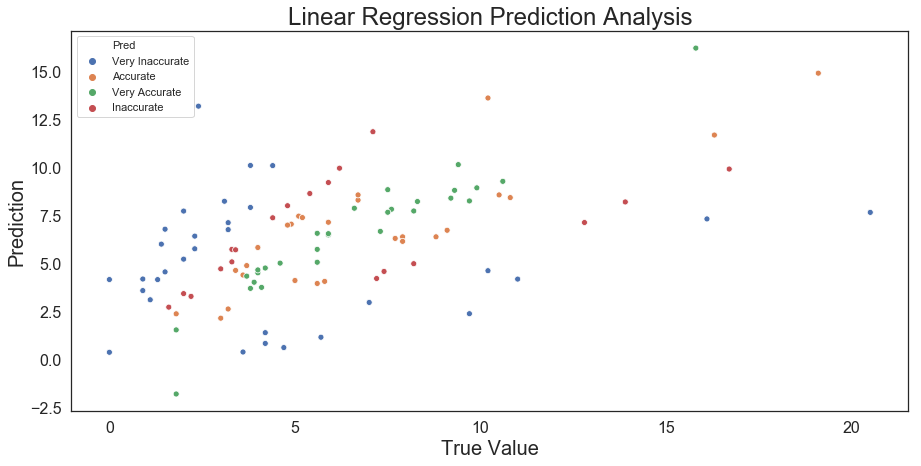

This model is able to relatively accurately predict 24.11% of NBA Rookies.
This model is able to very accurately predict 25.89% of NBA Rookies.


In [144]:
import seaborn as sns
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Linear Regression Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

## Extra Trees

In [145]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(min_samples_split=4, n_estimators=1000,bootstrap=True)
reg.fit(train_x.values, train_y.NBAPTS.values)

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=4,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

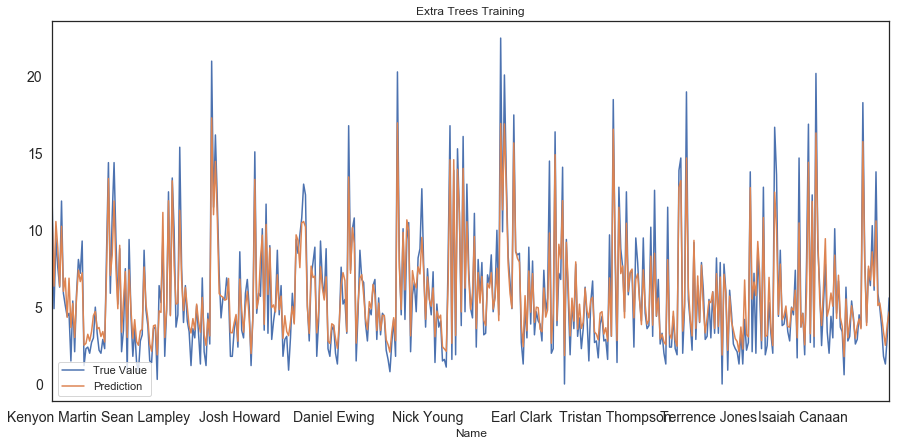

adj train r^2 = 0.8833706610366487
train mse = 1.7743595734646715


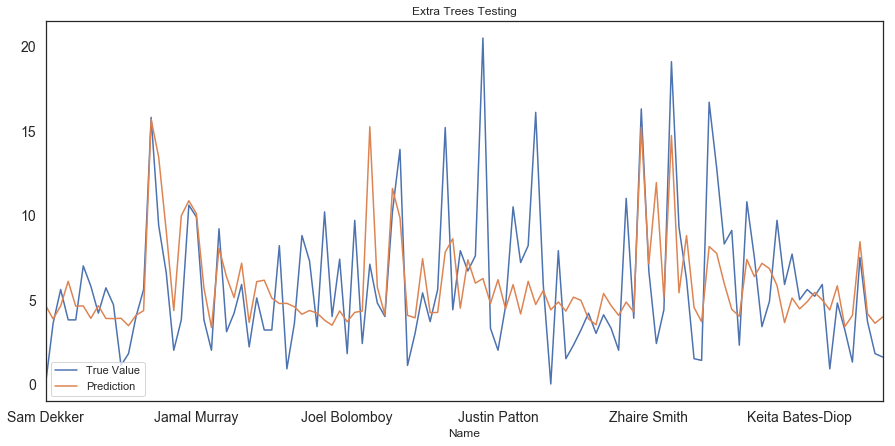

adj test r^2 = 0.22513737016174284
test mse = 11.956979640602025


In [146]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

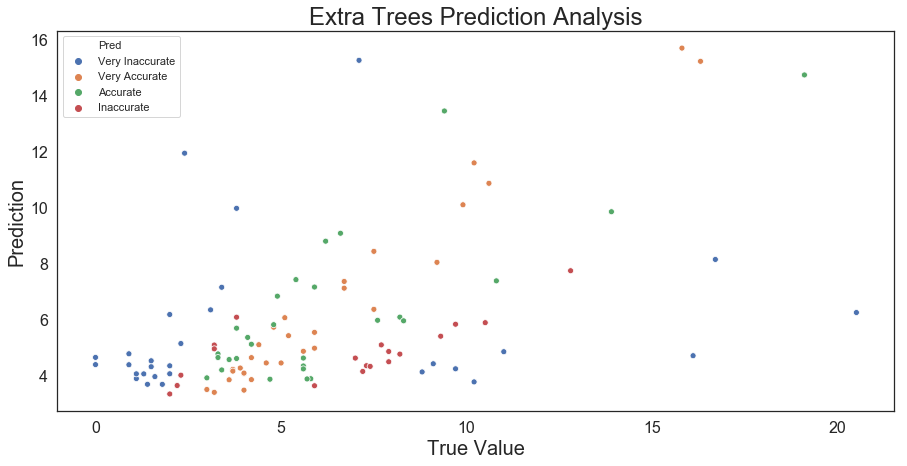

This model is able to relatively accurately predict 25.0% of NBA Rookies.
This model is able to very accurately predict 26.79% of NBA Rookies.


In [147]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Extra Trees Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

## Cross Validated Extra Trees

In [148]:
from sklearn.model_selection import cross_val_score
cross = np.split(df3, [37], axis=1)
cross_x=trains[0]
cross_y=trains[1]
cross_val_score(reg, cross_x, cross_y, cv=5, scoring='r2')

array([0.44598101, 0.36742549, 0.48599456, 0.36147014, 0.3844081 ])

In [156]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'max_depth': np.arange(7,28,2),
              'min_samples_split': np.arange(2,9),
              'bootstrap': [True, False],
              'n_estimators': [200,800]}

grid = RandomizedSearchCV(ExtraTreesRegressor(), param_grid, n_iter=10, cv=5)

In [157]:
grid.fit(cross_x, cross_y);

In [158]:
grid.best_params_

{'n_estimators': 800,
 'min_samples_split': 3,
 'max_depth': 13,
 'bootstrap': True}

In [159]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(min_samples_split=3, n_estimators=800, max_depth=13, bootstrap=True)
reg.fit(train_x.values, train_y.NBAPTS.values)

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=13,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=3,
          min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

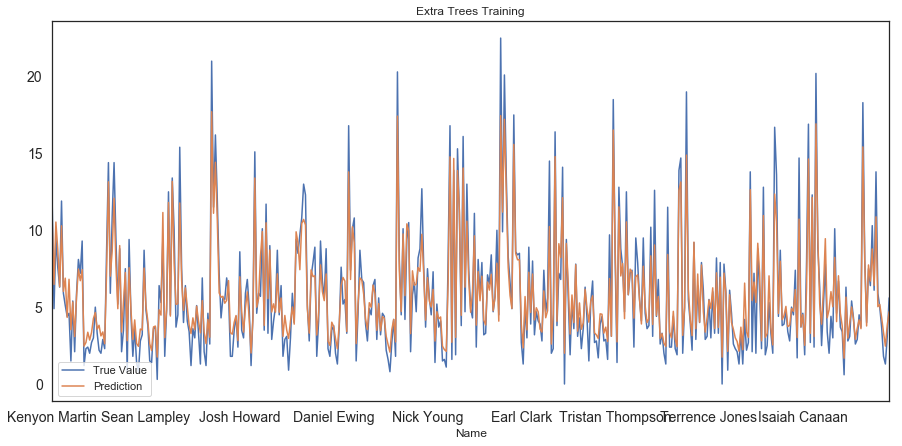

adj train r^2 = 0.8928918285534472
train mse = 1.6295077301450354


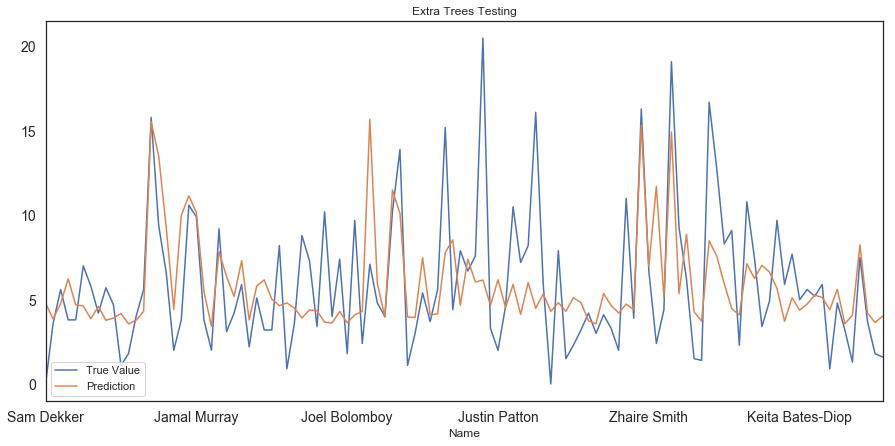

adj test r^2 = 0.2154366648310868
test mse = 12.106672155986777


In [160]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

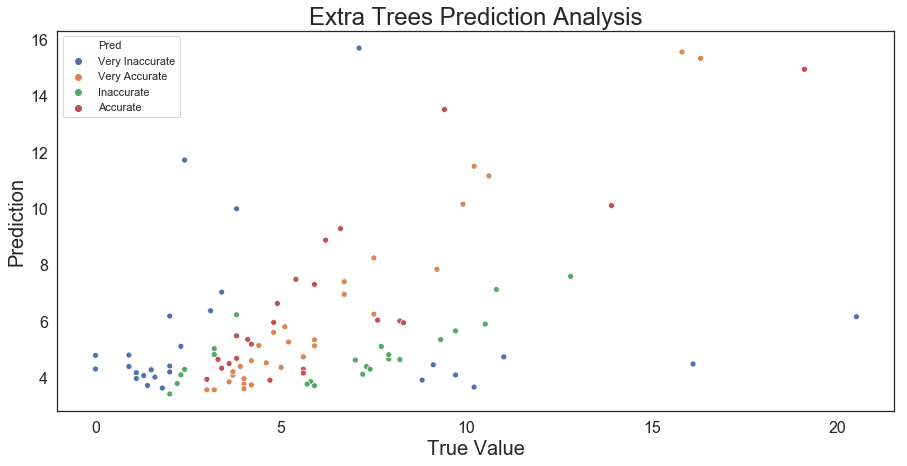

This model is able to relatively accurately predict 21.43% of NBA Rookies.
This model is able to very accurately predict 27.68% of NBA Rookies.


In [161]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Extra Trees Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

## Random Forrest

In [162]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.NBAPTS.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

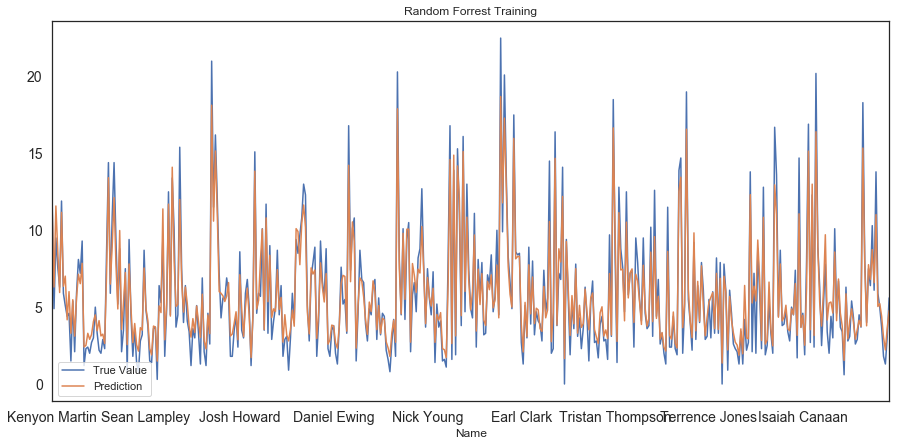

adj train r^2 = 0.9098974535162522
train mse = 1.3707898661521298


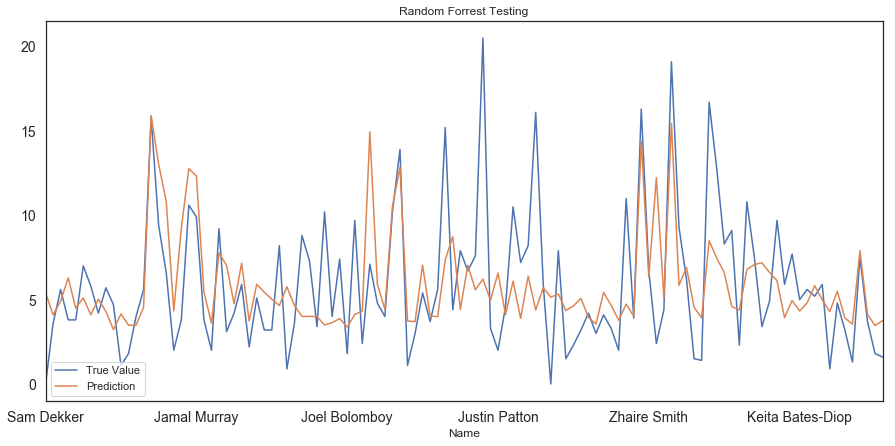

adj test r^2 = 0.21293639738939096
test mse = 12.14525402294642


In [163]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

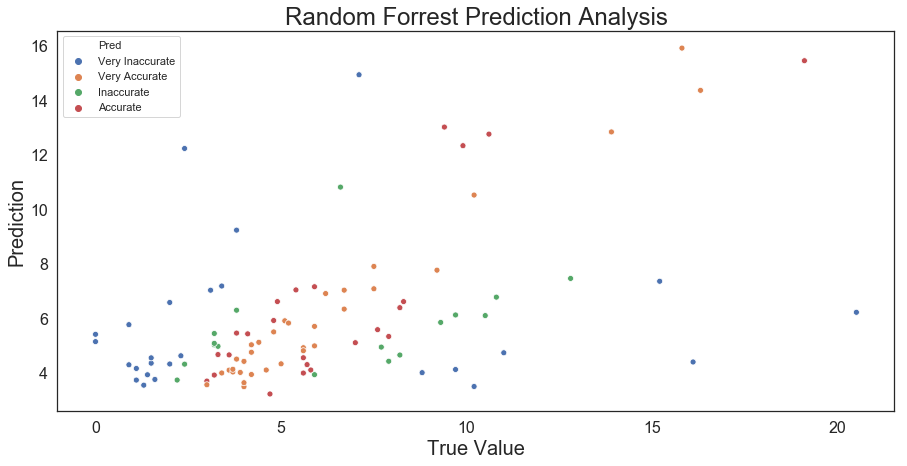

This model is able to relatively accurately predict 21.43% of NBA Rookies.
This model is able to very accurately predict 29.46% of NBA Rookies.


In [164]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Random Forrest Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

## XGBoost

In [165]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [168]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=1000, max_depth=6, reg_lambda=.48, gamma=.3, booster='gblinear')
reg.fit(train_x.values, train_y.NBAPTS.values)

XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.3, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=0.48, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

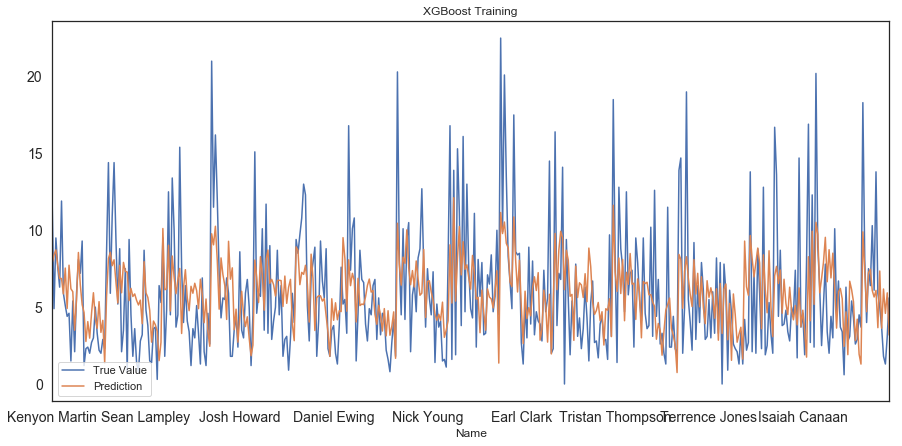

adj train r^2 = 0.29571653024947286
train mse = 10.714732057063669


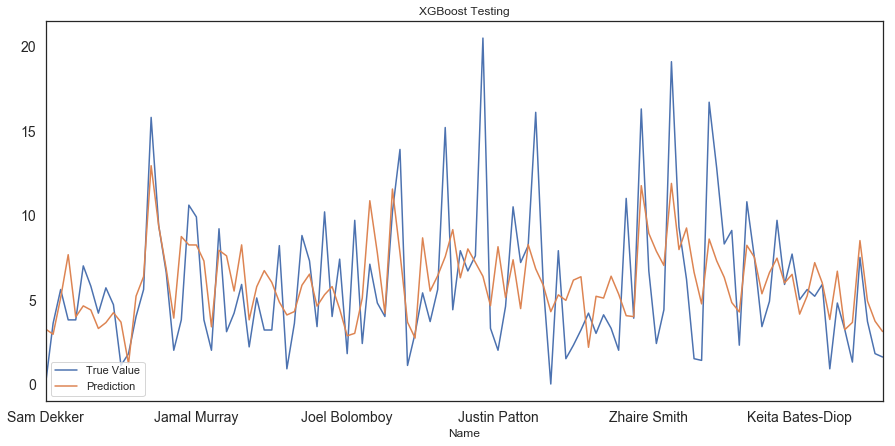

adj test r^2 = 0.26558423033220624
test mse = 11.332840257747211


In [169]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

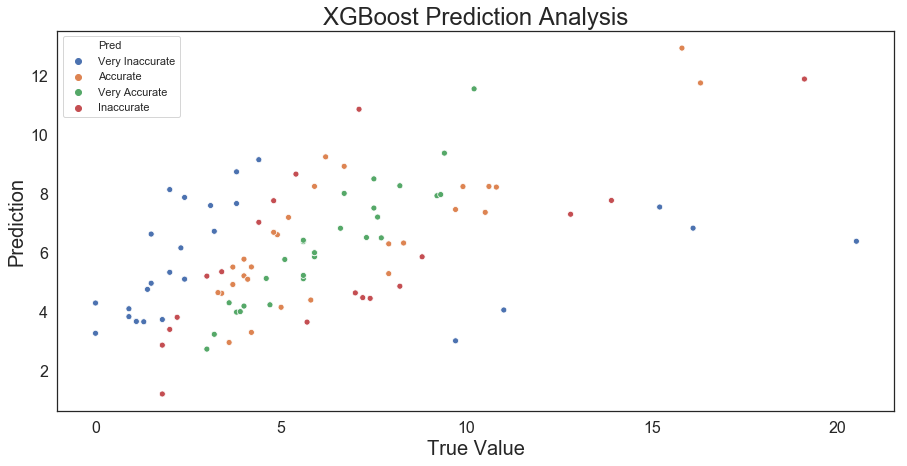

This model is able to relatively accurately predict 25.0% of NBA Rookies.
This model is able to very accurately predict 25.0% of NBA Rookies.


In [172]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("XGBoost Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

## Feed Forward Neural Network

In [173]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

In [175]:
K.clear_session()
model = Sequential()
model.add(Dense(128, input_dim=37, activation='tanh',kernel_regularizer=regularizers.l2(0.23)))
#model.add(Dropout(0.2))
model.add(Dense(64, activation='tanh',kernel_regularizer=regularizers.l2(0.13)))
model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=50, verbose=0, min_delta=.000001,restore_best_weights=True)
out = model.fit(train_x.values, train_y.NBAPTS.values, validation_data=[test_x.values, test_y['NBAPTS'].values.ravel()], epochs=500, verbose=0, shuffle=False, callbacks=[early_stop])

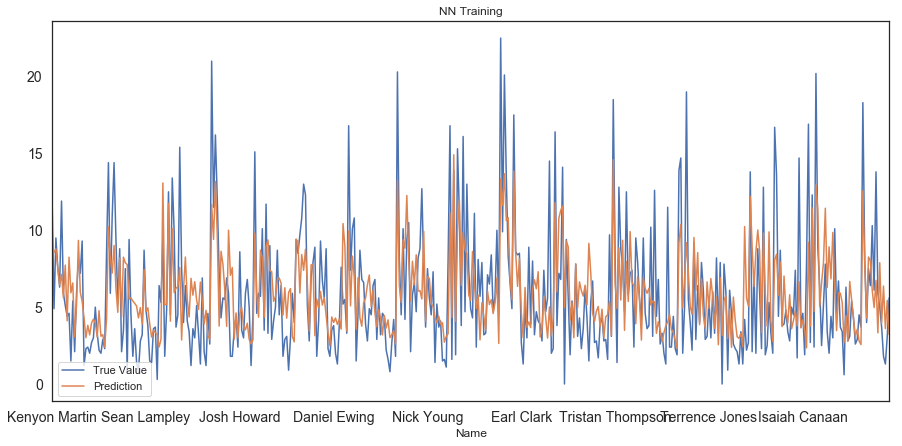

adj train r^2 = 0.4010683470116
train mse = 9.111944916921201


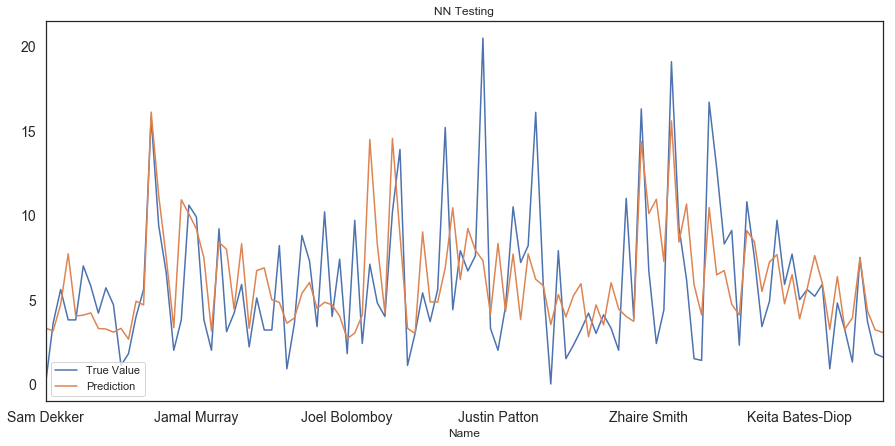

adj test r^2 = 0.25089302565136873
test mse = 11.559541647774704


In [176]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(model.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

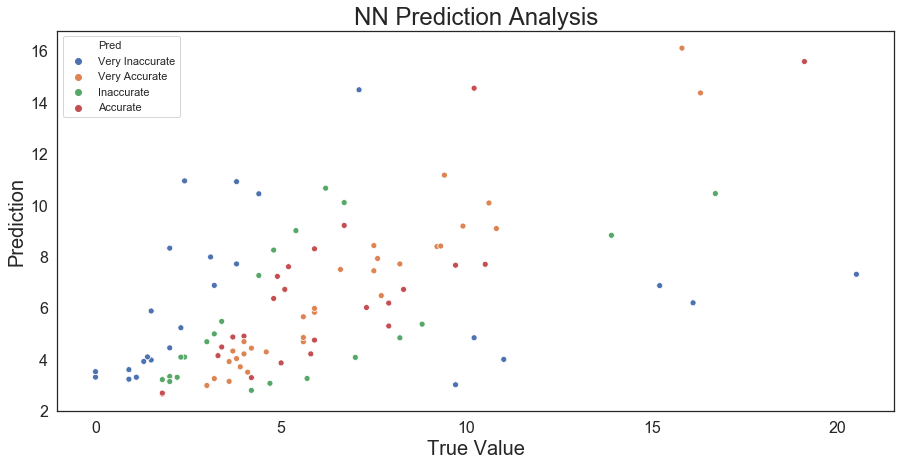

This model is able to relatively accurately predict 21.43% of NBA Rookies.
This model is able to very accurately predict 28.57% of NBA Rookies.


In [177]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("NN Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

In [179]:
test_y2[test_y2['NBAPTS']>15]

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,Pred
Name,,,,,,,
Ben Simmons,3.012851,5.037201,3.127936,1.997094,15.8,16.114187,Very Accurate
Lauri Markkanen,2.696037,-0.014101,0.296691,1.053548,15.2,6.871922,Very Inaccurate
Donovan Mitchell,0.689551,1.789936,2.613164,0.110003,20.5,7.313280,Very Inaccurate
Kyle Kuzma,2.062410,0.418868,0.296691,0.424518,16.1,6.203152,Very Inaccurate
Deandre Ayton,4.174501,0.418868,1.068849,1.997094,16.3,14.369355,Very Accurate
Trae Young,0.689551,4.965040,1.068849,-0.204512,19.1,15.591003,Accurate
Collin Sexton,0.267133,1.284806,0.039305,-0.519028,16.7,10.455307,Inaccurate


## LSTM

In [180]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [193]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(200, input_shape=(1, train_x.values.shape[1]), recurrent_activation='tanh', recurrent_regularizer=regularizers.l2(0.03), activation='tanh',kernel_initializer='lecun_uniform',return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(200, activation='tanh'))
#model_lstm.add(Dropout(0.4))
#model_lstm.add(LSTM(600, activation='tanh',kernel_initializer='lecun_uniform',return_sequences=True))
#model_lstm.add(Dropout(0.4))
#model_lstm.add(LSTM(600, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.NBAPTS.values.ravel(), validation_data=[X_tst_t, test_y['NBAPTS'].values.ravel()], epochs=100, verbose=0, shuffle=False, callbacks=[early_stop])

Restoring model weights from the end of the best epoch
Epoch 00099: early stopping


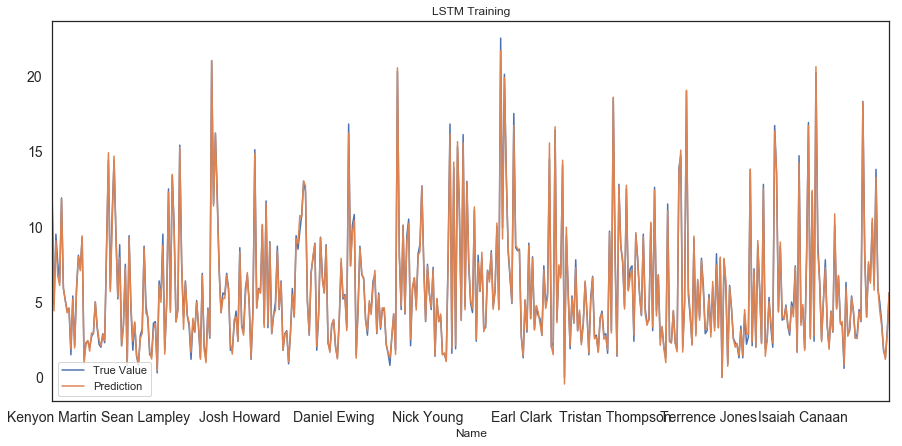

adj train r^2 = 0.9952669827251436
train mse = 0.07200653444202519


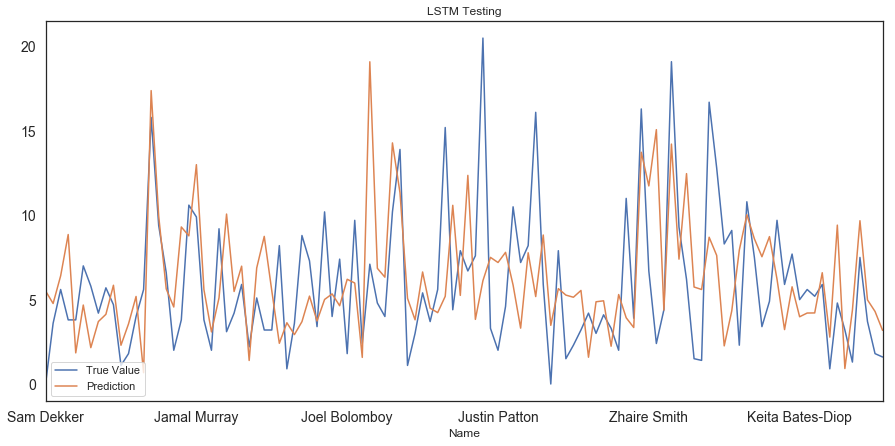

adj test r^2 = -0.12793161595191171
test mse = 17.405221065756546


In [194]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tr_t))
test_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tst_t))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

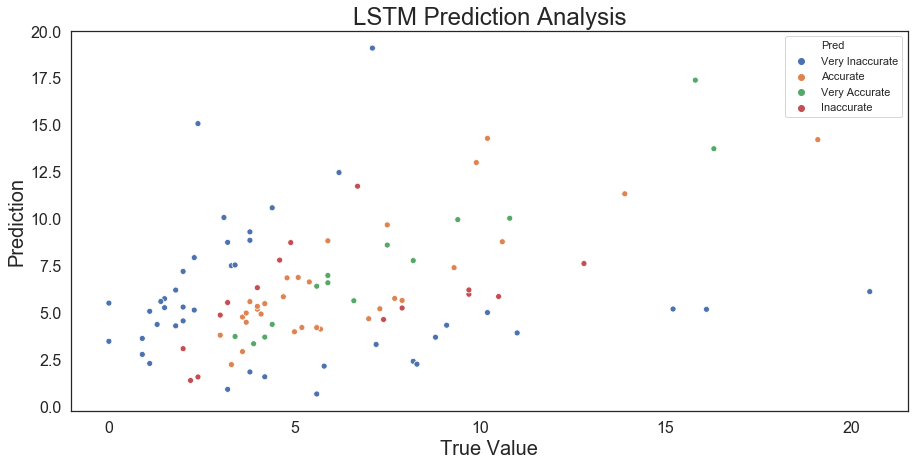

This model is able to relatively accurately predict 28.57% of NBA Rookies.
This model is able to very accurately predict 12.5% of NBA Rookies.


In [195]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("LSTM Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

## TPOT

In [196]:
from tpot import TPOTRegressor
from sklearn.metrics.scorer import make_scorer

#my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

tpot = TPOTRegressor(population_size=10, max_time_mins=1, verbosity=1, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.NBAPTS.values.ravel())


1.004888 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: DecisionTreeRegressor(CombineDFs(input_matrix, LinearSVR(input_matrix, C=10.0, dual=True, epsilon=0.0001, loss=epsilon_insensitive, tol=0.0001)), max_depth=2, min_samples_leaf=18, min_samples_split=19)


TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=1, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=10,
       random_state=None, scoring=None, subsample=1.0,
       template='RandomTree', use_dask=False, verbosity=1,
       warm_start=False)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


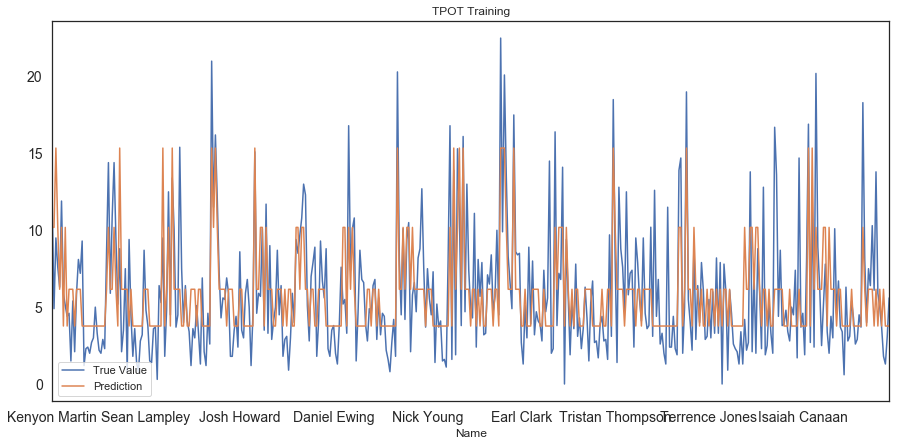

adj train r^2 = 0.42302860740991854
train mse = 8.77784889425766


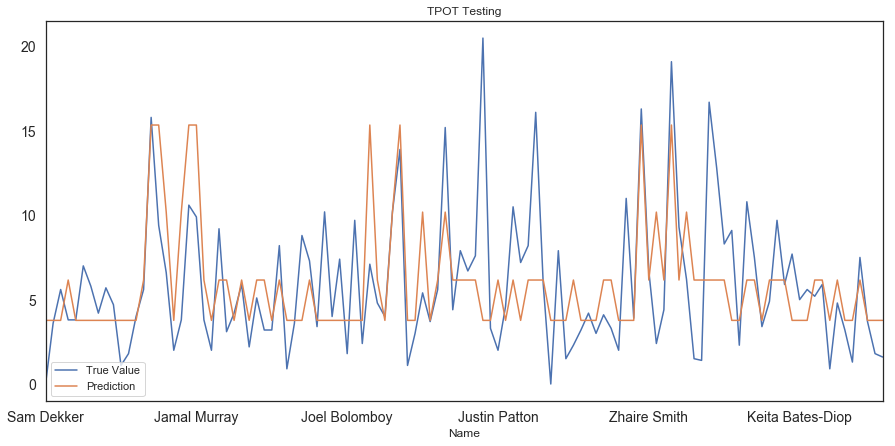

adj test r^2 = 0.13951089299577568
test mse = 13.278290031301413


In [197]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(tpot.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(tpot.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

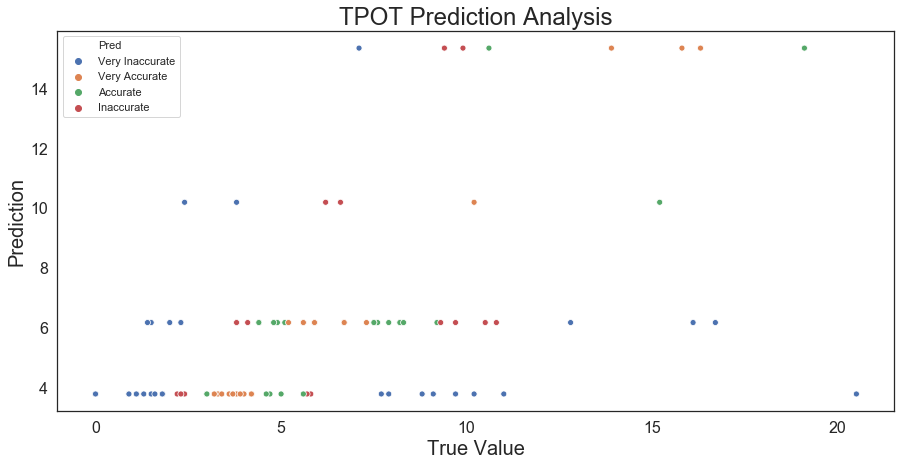

This model is able to relatively accurately predict 21.43% of NBA Rookies.
This model is able to very accurately predict 28.57% of NBA Rookies.


In [198]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("TPOT Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

## Differences

In [199]:
test_y2['chip'] = abs(test_y2['NBAPTS'] - test_y2['prediction'])
test_y2.sort_values('chip', ascending=True).head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,Pred,chip
Name,,,,,,,,
Lonzo Ball,2.379224,4.315587,3.127936,1.682579,10.2,10.187234,Very Accurate,0.012766
Justin Anderson,0.003121,-0.519231,-0.475467,0.739033,3.8,3.770936,Very Accurate,0.029064
Hamidou Diallo,-0.260890,-0.663554,-0.218081,-0.204512,3.7,3.770936,Very Accurate,0.070936
Wesley Iwundu,-0.102483,-0.230585,0.039305,-0.204512,3.7,3.770936,Very Accurate,0.070936
Sindarius Thornwell,-0.260890,-0.230585,0.554077,0.110003,3.9,3.770936,Very Accurate,0.129064


In [200]:
test_y2['chip'] = abs(test_y2['NBAPTS'] - test_y2['prediction'])
test_y2.sort_values('chip', ascending=False).head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,Pred,chip
Name,,,,,,,,
Donovan Mitchell,0.689551,1.789936,2.613164,0.110003,20.5,3.770936,Very Inaccurate,16.729064
Collin Sexton,0.267133,1.284806,0.039305,-0.519028,16.7,6.161798,Very Inaccurate,10.538202
Kyle Kuzma,2.062410,0.418868,0.296691,0.424518,16.1,6.161798,Very Inaccurate,9.938202
Markelle Fultz,0.372737,1.862097,1.068849,0.110003,7.1,15.347368,Very Inaccurate,8.247368
Jaren Jackson,-0.788913,-0.519231,0.039305,-0.833543,2.4,10.187234,Very Inaccurate,7.787234


## 2019 Predictions

In [218]:
train=df3
test=df4
trains = np.split(train, [37], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [37], axis=1)
test_x=tests[0]
test_y=tests[1]

In [219]:
test_y.head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,
Zion Williamson,-1.264133,-0.880038,-1.247624,-0.833543,-1.279283
Jaxson Hayes,-1.264133,-0.880038,-1.247624,-0.833543,-1.279283
Nickeil Alexander-Walker,-1.264133,-0.880038,-1.247624,-0.833543,-1.279283
RJ Barrett,-1.264133,-0.880038,-1.247624,-0.833543,-1.279283
Ignas Brazdeikis,-1.264133,-0.880038,-1.247624,-0.833543,-1.279283


In [220]:
from sklearn.feature_selection import RFE
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
scalars = [sc2, sc3, sc4, sc5, sc6]
test_y2 = test_y.copy(deep=True)
for x in range(5):
    col = cols_at_end[x]
    scalar = scalars[4-x]
    model = LinearRegression()
    rfe = RFE(model, 37)
    reg = rfe.fit(train_x.values, train_y[col].values)
    cols = []
    co = df3.columns
    for colo in co:
        cols = cols + [colo]
    picks = []
    for x in range(0,37):
        if reg.support_[x]:
            picks.append(cols[x])
    train_x3 = train_x[picks]
    test_x3 = test_x[picks]
    K.clear_session()
    model = Sequential()
    model.add(Dense(128, input_dim=37, activation='tanh',kernel_regularizer=regularizers.l2(0.23)))
    model.add(Dense(64, activation='tanh',kernel_regularizer=regularizers.l2(0.13)))
    model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='Adam', loss='mean_squared_error')
    early_stop = EarlyStopping(monitor='loss', patience=50, verbose=0, min_delta=.000001,restore_best_weights=True)
    out = model.fit(train_x3.values, train_y[col].values.ravel(), validation_data=[test_x3.values, test_y[col].values.ravel()], epochs=500, verbose=0, shuffle=False, callbacks=[early_stop])
    test_y2[col] = scalar.inverse_transform(model.predict(test_x3.values))

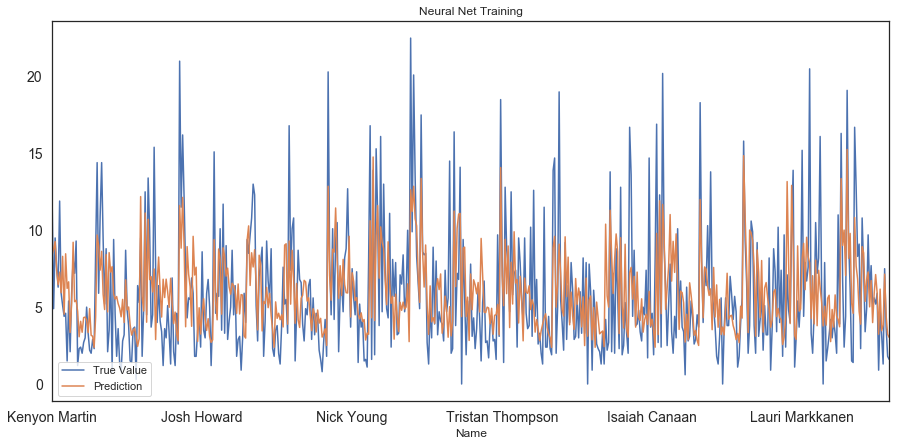

adj train r^2 = 0.3858950284952052
train mse = 9.539733361504986


In [221]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x3.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Neural Net Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Neural Net Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))

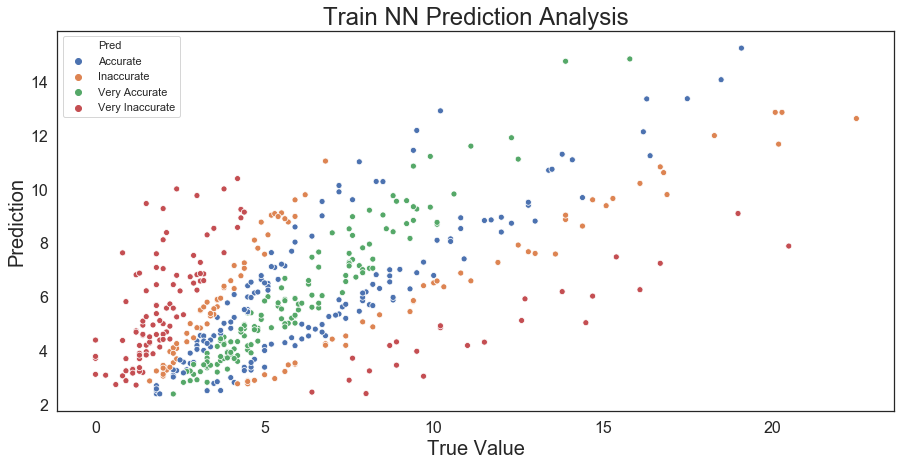

This model is able to relatively accurately predict 27.73% of NBA Rookies.
This model is able to very accurately predict 25.04% of NBA Rookies.


In [222]:
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=train_y2)
ax.set_title("Train NN Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(train_y2[train_y2['Pred'] == 'Accurate'])/len(train_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(train_y2[train_y2['Pred'] == 'Very Accurate'])/len(train_y2),2)) + "% of NBA Rookies.")

## Results

In [223]:
test_y2 = test_y2.loc[~test_y2.index.duplicated(keep='first')]

In [224]:
test_y2['Value'] = 1*test_y2['NBAPTS'] + 1.2*test_y2['NBATRB'] + 1.5*test_y2['NBAAST'] + 3*test_y2['NBASTL'] + 3*test_y2['NBABLK']
test_y2.sort_values('Value', ascending=False)

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Value
Name,,,,,,
Zion Williamson,6.654555,2.190662,1.212149,0.659832,14.519169,31.406570
Ja Morant,3.867706,5.921957,0.925933,0.345394,11.600158,28.938320
RJ Barrett,4.289773,3.437813,0.741318,0.256156,14.549944,27.846811
Darius Garland,3.122467,4.428914,0.812530,0.282002,12.612978,26.286903
Coby White,3.037821,4.168892,0.823812,0.265123,12.571198,25.736727
Jaxson Hayes,5.687759,1.041709,0.665107,0.907943,10.597444,23.704472
Brandon Clarke,5.737184,1.343485,0.729369,0.971812,9.311975,23.315363
Rui Hachimura,4.764773,1.895923,0.700039,0.416965,10.843265,22.755888
Cameron Johnson,4.591692,2.156130,0.806005,0.473522,8.716339,21.299145


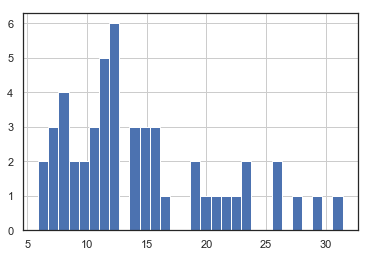

Value Distribution in Draft


In [225]:
hist = test_y2['Value'].hist(bins=30)
plt.show()
print('Value Distribution in Draft')
## This is the result of Neural Networks

In [226]:
test_y2['NBAPTS'].mean()

6.527386665344238

In [227]:
test_y2 = test_y2.round(2)
test_y2 = test_y2.sort_index(axis = 0) 
test_y2.head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Value
Name,,,,,,
Admiral Schofield,1.78,0.56,0.35,0.13,3.97,8.38
Bol Bol,2.77,0.38,0.22,0.69,4.71,11.36
Brandon Clarke,5.74,1.34,0.73,0.97,9.31,23.32
Bruno Fernando,4.35,0.94,0.39,0.66,6.22,16.01
Cam Reddish,1.99,1.34,0.66,0.27,8.03,15.24


In [228]:
dfn = pd.read_csv('CollegeRookieStatLog5.csv')
dfn = dfn[['Name','Pos']]
finaly = test_y2.merge(dfn, left_on='Name', right_on='Name')
finaly.head()

,Name,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Value,Pos
0,Admiral Schofield,1.78,0.56,0.35,0.13,3.97,8.38,SF
1,Bol Bol,2.77,0.38,0.22,0.69,4.71,11.36,C
2,Brandon Clarke,5.74,1.34,0.73,0.97,9.31,23.32,PF
3,Bruno Fernando,4.35,0.94,0.39,0.66,6.22,16.01,C
4,Cam Reddish,1.99,1.34,0.66,0.27,8.03,15.24,SG


In [229]:
finaly.to_csv('NewRookiePredictions4.csv')

## Draft Night vs Results

In [230]:
college2 = pd.read_csv('2019DraftResults.csv')
dfo = pd.read_csv('NewRookiePredictions4.csv')

In [231]:
college2 = college2.drop(['Unnamed: 0'], axis=1)
dfo = dfo.drop(['Unnamed: 0'], axis=1)
dfo = dfo.sort_values('Value', ascending=False)
dfo = dfo.reset_index()
dfo = dfo.drop(['index'], axis=1)
college2 = college2.rename(index=str, columns={"emp": "Name"})

In [232]:
from IPython.display import display_html 
df1_styler = college2[college2['pos']=='PG'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Point Guards:')
df2_styler = dfo[dfo['Pos']=='PG'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Point Guards:')
display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,Name,height,weight,pos,col,age
1,Ja Morant,6-3,175,PG,Murray St.,19
4,Darius Garland,6-2,175,PG,Vanderbilt,19
6,Coby White,6-5,190,PG,North Carolina,19
23,Ty Jerome,6-5,195,PG,Virginia,21
27,Jordan Poole,6-5,190,PG,Michigan,20
32,Carsen Edwards,6-0,200,PG,Purdue,21
42,Jaylen Nowell,6-4,200,PG,Washington,19
50,Tremont Waters,5-11,175,PG,LSU,21
52,Justin Wright-Foreman,6-2,190,PG,Hofstra,21
54,Kyle Guy,6-2,170,PG,Virginia,21


In [233]:
df1_styler = college2[college2['pos']=='SG'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Shooting Guards:')
df2_styler = dfo[dfo['Pos']=='SG'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Shooting Guards:')
display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,Name,height,weight,pos,col,age
2,RJ Barrett,6-7,210,SG,Duke,19
5,Jarrett Culver,6-6,195,SG,Texas Tech,20
9,Cameron Reddish,6-8,210,SG,Duke,19
12,Tyler Herro,6-6,195,SG,Kentucky,19
13,Romeo Langford,6-6,210,SG,Indiana,19
16,Nickeil Alexander-Walker,6-5,205,SG,Virginia Tech,20
19,Matisse Thybulle,6-6,200,SG,Washington,22
25,Dylan Windler,6-7,195,SG,Belmont,22
28,Keldon Johnson,6-6,215,SG,Kentucky,19
29,Kevin Porter,6-5,215,SG,USC,19


In [234]:
df1_styler = college2[college2['pos']=='SF'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Small Forwards:')
df2_styler = dfo[dfo['Pos']=='SF'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Small Forwards:')
display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,Name,height,weight,pos,col,age
3,DeAndre Hunter,6-7,225,SF,Virginia,21
8,Rui Hachimura,6-8,235,SF,Gonzaga,21
10,Cameron Johnson,6-8,205,SF,North Carolina,23
14,Sekou Doumbouya,6-9,230,SF,France,18
15,Chuma Okeke,6-8,235,SF,Auburn,20
22,Darius Bazley,6-9,210,SF,USA,19
24,Nassir Little,6-6,225,SF,North Carolina,19
36,Deividas Sirvydis,6-8,195,SF,Lithuania,19
41,Admiral Schofield,6-5,240,SF,Tennessee,22
44,Isaiah Roby,6-8,215,SF,Nebraska,21


In [235]:
df1_styler = college2[college2['pos']=='PF'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Power Forwards:')
df2_styler = dfo[dfo['Pos']=='PF'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Power Forwards:')
display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,Name,height,weight,pos,col,age
0,Zion Williamson,6-6,280,PF,Duke,18
7,Jaxson Hayes,6-11,220,PF,Texas,19
11,PJ Washington,6-8,230,PF,Kentucky,20
18,Luka Samanic,6-11,230,PF,Croatia,19
20,Brandon Clarke,6-8,210,PF,Gonzaga,22
21,Grant Williams,6-7,240,PF,Tennessee,20
26,Mfiondu Kabengele,6-10,255,PF,Florida St.,21
30,Nicolas Claxton,6-11,215,PF,Georgia,20
37,Daniel Gafford,6-10,240,PF,Arkansas,20
38,Alen Smailagic,6-10,215,PF,Serbia,18


In [236]:
df1_styler = college2[college2['pos']=='C'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Centers:')
df2_styler = dfo[dfo['Pos']=='C'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Centers:')
display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

Draft Results Centers: Name height weight pos col age 
 
 17 
 Goga Bitadze 
 6-11 
 250 
 C 
 Rep. of Georgia 
 19 
 
 
 33 
 Bruno Fernando 
 6-10 
 240 
 C 
 Maryland 
 20 
 
 
 43 
 Bol Bol 
 7-2 
 210 
 C 
 Oregon 
 19 
 
 
 58 
 Dewan Hernandez 
 6-10 
 235 
 C 
 Miami 
 22 
 
 Power Ranking Centers: Name NBATRB NBAAST NBASTL NBABLK NBAPTS Value Pos 
 
 14 
 Bruno Fernando 
 4.35 
 0.94 
 0.39 
 0.66 
 6.22 
 16.01 
 C 
 
 
 31 
 Bol Bol 
 2.77 
 0.38 
 0.22 
 0.69 
 4.71 
 11.36 
 C